# EDA & Modelling

## Package loading

In [1]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import to_graphviz
from polylearn import PolynomialNetworkClassifier
from polylearn import FactorizationMachineClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from keras.callbacks import EarlyStopping
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from pandas.api.types import is_numeric_dtype
from itertools import product
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.features import pca_decomposition
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from keras.utils.vis_utils import plot_model
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'classification'

In [3]:
stacking = 'True'

In [4]:
data_size = 'small'

In [5]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.11/dataset/titanic.csv')

In [6]:
target_col = 'survived'

In [7]:
user_drop_cols = []

In [8]:
threshold_NaN = 0.5

In [9]:
threshold_cat = 5

In [10]:
threshold_Z = 3.0

### Dataset Information

In [11]:
df.shape

(891, 15)

#### Some records

In [12]:
display(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Dataframe structure

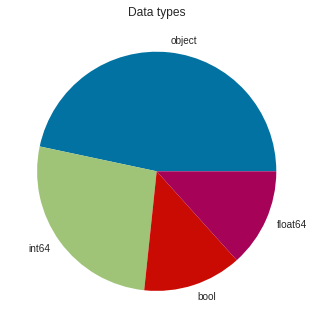

In [13]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [14]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### Which columns could be categorical ?

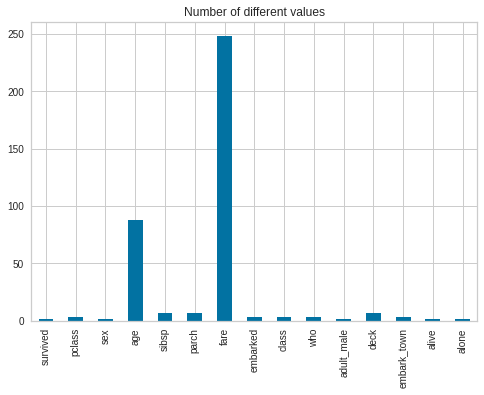

In [15]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [16]:
duplicates(df)

Number of rows before removing: 891
Number of duplicate rows: 107
Number of rows after removing: 784


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Drop user's columns:

In [17]:
print('user_drop_cols = ', user_drop_cols)

user_drop_cols =  []


In [18]:
df = df.drop(user_drop_cols, axis=1)

#### Drop NaN:

In [19]:
df, drop_cols = drop_na(df, threshold_NaN)

Drop columns containing more than 50.0 % of NaN: ['deck']


Final set of dropped columns

In [20]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [21]:
display(dropped_cols)

array(['deck'], dtype=object)

#### Encoding data:

In [22]:
df, encoded_cols = encoding(df, threshold_cat)

Column  survived  is categorical.
Column  pclass  is categorical.
Encoding object column: sex
Encoding numeric column: age
Encoding numeric column: sibsp
Encoding numeric column: parch
Encoding numeric column: fare
Encoding object column: embarked
Encoding object column: class
Encoding object column: who
Column  adult_male  is categorical.
Encoding object column: embark_town
Encoding object column: alive
Column  alone  is categorical.


#### Imputing NaN using IterativeImputer

No handles with labels found to put in legend.


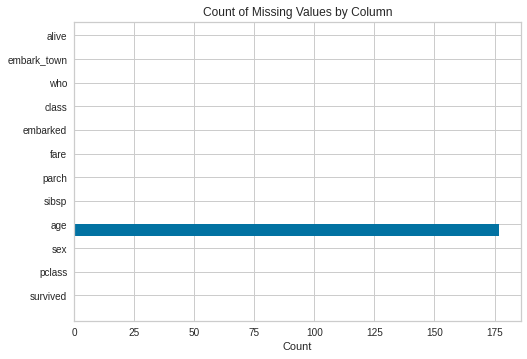

In [23]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [24]:
df = imputation(df)

Imputing NaN using IterativeImputer


#### Data compression:

In [25]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.10MB
Memory usage after optimization is: 0.02MB
Decreased by 74.9%


##### Dataframe structure after compression

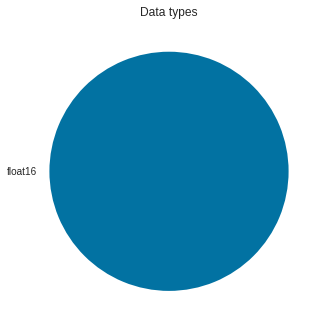

In [26]:
plot_dataframe_structure(df)

#### Outliers:

In [27]:
df = outliers(df, threshold_Z)

Using Z_score,  71  rows will be suppressed.


#### Splitting dataframe in features and targets

In [28]:
y = df[target_col]

In [29]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

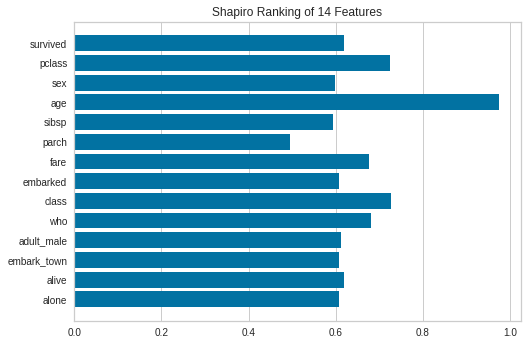

In [30]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

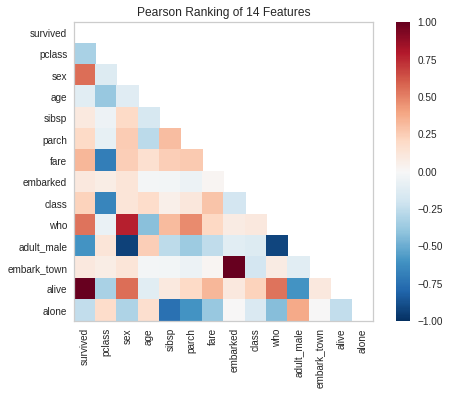

In [31]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

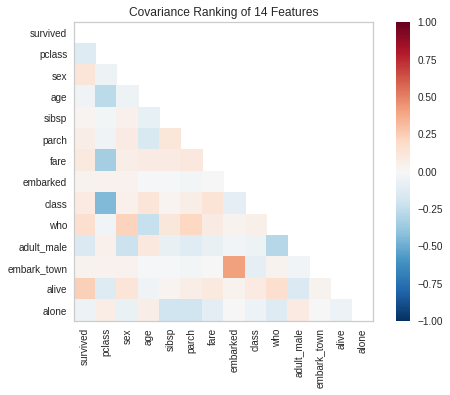

In [32]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

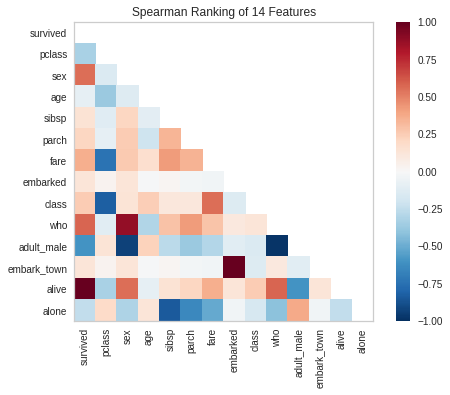

In [33]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

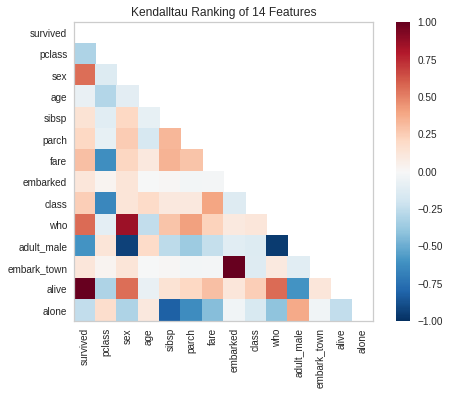

In [34]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

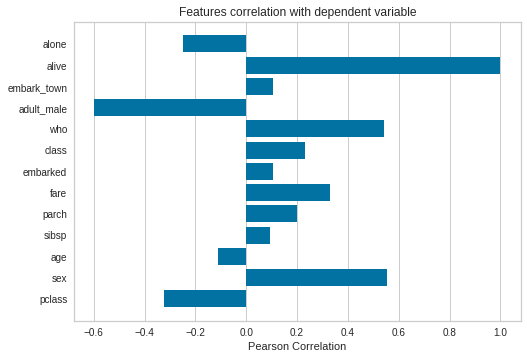

In [35]:
feature_correlation(X, y);

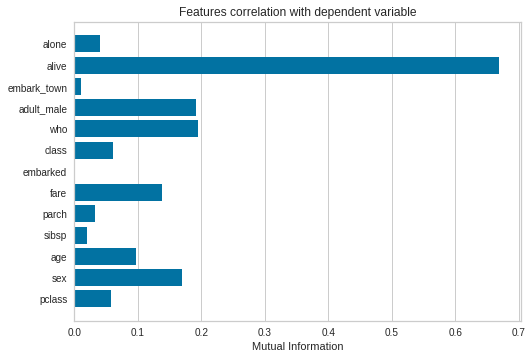

In [36]:
feature_correlation(X, y, method='mutual_info-classification');

#### Feature importance (a priori)

##### According to decision tree

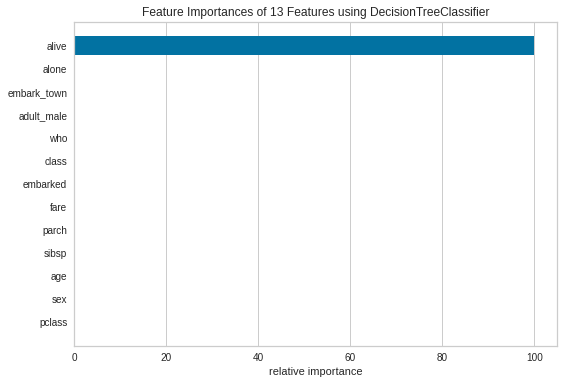

In [37]:
feature_importances(DecisionTreeClassifier(), X, y);

##### According to logistic regression

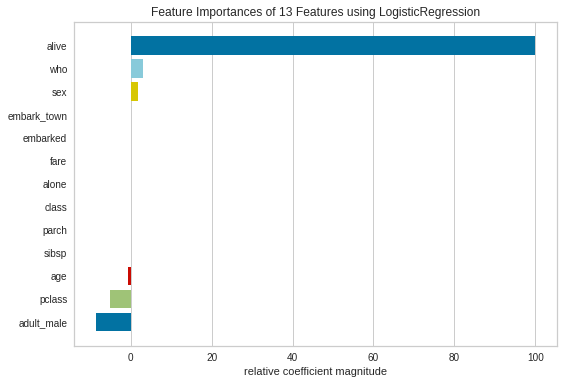

In [38]:
feature_importances(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, y);

#### PCA

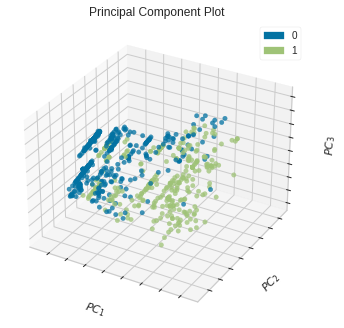

In [39]:
pca_decomposition(X, y.astype(int), projection=3);

#### Class balancing

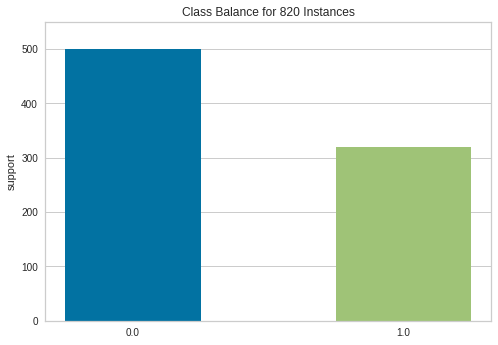

Entropy =  0.9649567669505686


In [40]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

## Splittings 

##### Dimensions

In [41]:
d_F=len(X.columns.tolist())

In [42]:
d_T=len(y.unique())

##### Splitting data in train and test sets 

In [43]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33, stratify=None)

## Modelling

### Model building

##### Keras neural network definition

In [44]:
def K_Class(): 
    keras.backend.clear_session() 
#   neural network architecture: start 
    model = Sequential() 
    model.add(Dense(d_F + d_T + 2, input_dim=d_F, activation='relu')) 
    model.add(BatchNormalization()) 
#    model.add(LayerNormalization()) 
    model.add(Dense(d_T, activation='softmax')) 
#   neural network architecture: end   
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
#   Keras training parameters: epoch and batch_size 
K_C = KerasClassifier(build_fn=K_Class, epochs=1000, batch_size=64, verbose=0) 
K_C._estimator_type = 'classifier' 

##### Level-0 models

In [45]:
level_0 = [ 
          ('GPC', GaussianProcessClassifier(kernel = ConstantKernel() +  RBF() + WhiteKernel())), 
          ('DTC', DecisionTreeClassifier(max_depth=5)), 
          ('RFC', RandomForestClassifier(max_depth=5, n_estimators=10, max_features='auto')), 
          ('ABC', AdaBoostClassifier()), 
          ('LOGR', LogisticRegression()), 
          ('MLPC', MLPClassifier(alpha=1, max_iter=1000, early_stopping=True)), 
          ('KNC', KNeighborsClassifier(n_neighbors=len(y.unique()))), 
          ('GNB', GaussianNB()), 
          ('XGBC', XGBClassifier(max_depth=5, n_estimators=10, verbosity=0)), 
          ('KERC', K_C), 
          ]

##### Level-1 model

In [46]:
level_1 = MLPClassifier()

##### Stacking for classification

In [47]:
model = StackingClassifier(level_0, final_estimator=level_1)

### Model fitting

In [48]:
%%time
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 6min 48s, sys: 3min 50s, total: 10min 39s
Wall time: 3min 29s


StackingClassifier(estimators=[('GPC',
                                GaussianProcessClassifier(kernel=1**2 + RBF(length_scale=1) + WhiteKernel(noise_level=1))),
                               ('DTC', DecisionTreeClassifier(max_depth=5)),
                               ('RFC',
                                RandomForestClassifier(max_depth=5,
                                                       n_estimators=10)),
                               ('ABC', AdaBoostClassifier()),
                               ('LOGR', LogisticRegression()),
                               ('MLPC',
                                MLPClassifier(alpha=1, early_stopping=True,
                                              max_iter=100...
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=10, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, reg_alpha=None,
                                              reg_lambda=None,
                                              scale_pos_weight=None,
                                              subsample=None, tree_method=None,
                                              validate_parameters=None,
                                              verbosity=0)),
                               ('KERC',
                                <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f80ca9ce4f0>)],
                   final_estimator=MLPClassifier())

#### Keras neural network description

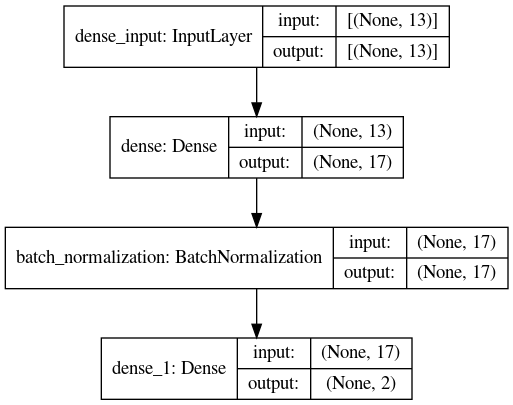

In [49]:
plot_model(K_Class(), show_shapes=True, show_layer_names=True)

### Model evaluation

#### Model scoring

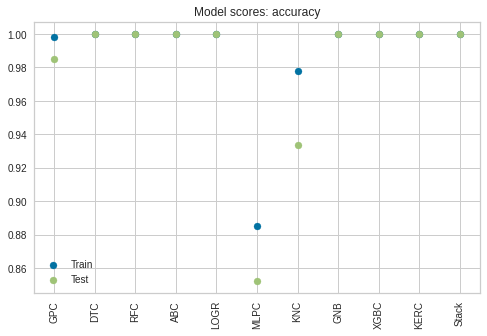

array([['GPC', 0.9981785063752276, 0.985239852398524],
       ['DTC', 1.0, 1.0],
       ['RFC', 1.0, 1.0],
       ['ABC', 1.0, 1.0],
       ['LOGR', 1.0, 1.0],
       ['MLPC', 0.8852459016393442, 0.8523985239852399],
       ['KNC', 0.9781420765027322, 0.933579335793358],
       ['GNB', 1.0, 1.0],
       ['XGBC', 1.0, 1.0],
       ['KERC', 1.0, 1.0],
       ['Stack', 1.0, 1.0]], dtype=object)

In [50]:
score_stacking_c(model, X_train, y_train, X_test, y_test)

#### ROC/AUC

In [51]:
classes = y.unique()

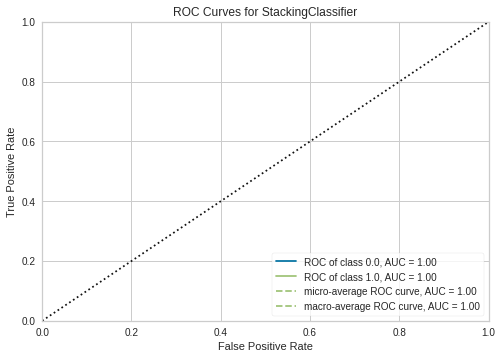

In [52]:
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

#### Classification report

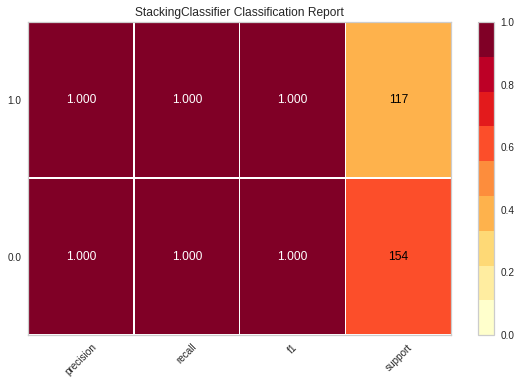

In [53]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

#### Confusion matrix

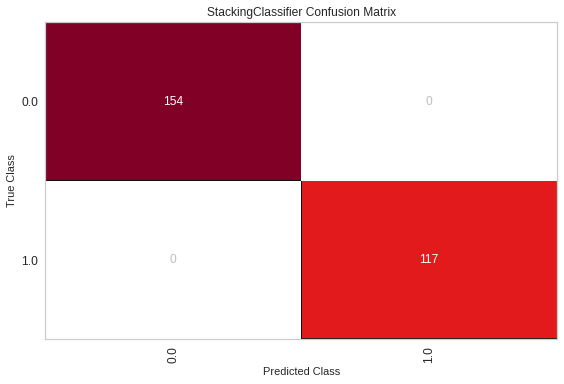

In [54]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

#### Class prediction error

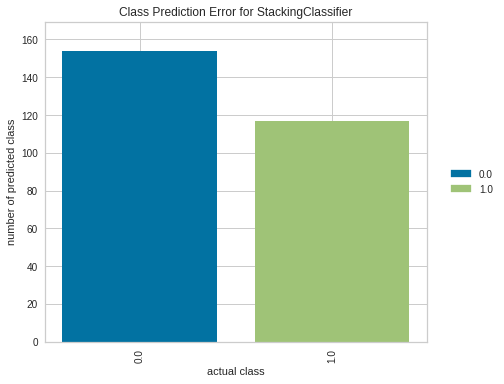

In [55]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);